<a href="https://colab.research.google.com/github/jahnavipalle/JahnaviPortfolio1/blob/main/machine_learing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload a black & white image file:


Saving black and white image.jpg to black and white image.jpg


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 2)    │         2,306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,010 (2.54 MB)

 Trainable params: 667,010 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


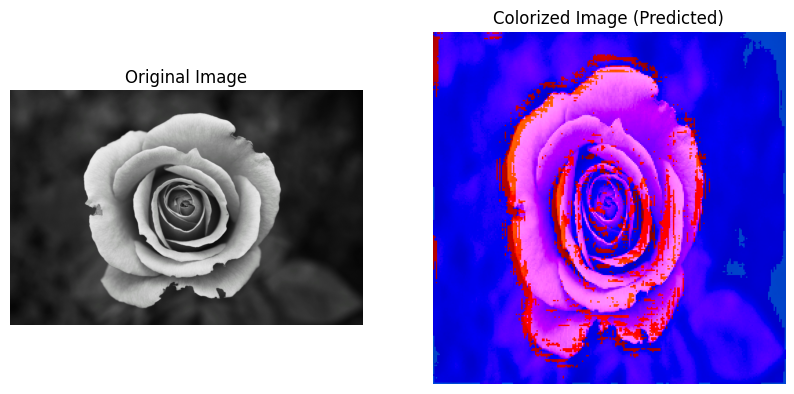

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install/Upgrade packages (Optional in Colab)
!pip install --upgrade tensorflow opencv-python matplotlib

# Step 2: Import libraries
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from google.colab import files
import sys # Import sys to exit if image is not loaded

# Step 3: Upload Black & White image
print("Upload a black & white image file:")
uploaded = files.upload()

# Grab the uploaded file name
if not uploaded:
    print("No file was uploaded.")
    sys.exit() # Exit if no file is uploaded
img_path = next(iter(uploaded.keys()))

# Step 4: Preprocess image to LAB color space
def preprocess(img_path):
    img = cv2.imread(img_path)
    # Add a check to see if the image was loaded successfully
    if img is None:
        print(f"Error: Could not read image from {img_path}. Please check if it's a valid image file.")
        return None, None # Return None for both channels to indicate failure

    img = cv2.resize(img, (256, 256))
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l = img_lab[:, :, 0] / 255.0  # Normalize L channel
    ab = img_lab[:, :, 1:] / 128.0  # Normalize ab channels
    return l.reshape(256, 256, 1), ab

l_channel, ab_channels = preprocess(img_path)

# Check if preprocessing failed
if l_channel is None or ab_channels is None:
    print("Preprocessing failed. Exiting.")
    sys.exit() # Exit if preprocessing failed


# Step 5: Build simple CNN model to predict ab channels from L channel
def build_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(256, 256, 1)))

    model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2,2)))

    model.add(layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2,2)))

    model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2,2)))

    model.add(layers.Conv2D(2, (3,3), activation='tanh', padding='same'))
    return model

model = build_model()
model.compile(optimizer='adam', loss='mse')
model.summary()

# Step 6: (Optional) Train the model — requires dataset, so skipping here
# You can load a dataset with many images if you want to train

# Step 7: Predict ab channels from input L channel
l_input = l_channel.reshape(1, 256, 256, 1)
ab_pred = model.predict(l_input)[0]

# Step 8: Convert LAB back to BGR for visualization
def postprocess(l, ab):
    l = l * 255.0
    ab = ab * 128.0
    lab = np.zeros((256, 256, 3))
    # Ensure l and ab have the correct shapes before assignment
    # l should be (256, 256, 1) and ab should be (256, 256, 2)
    # The reshape in preprocess and the slicing of ab_pred should ensure this.
    # We can add assertions here for robustness if needed, but relying on the
    # shapes from the previous steps for now.
    lab[:, :, 0] = l[:, :, 0]
    lab[:, :, 1:] = ab
    lab = lab.astype(np.uint8)
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return bgr

colorized_img = postprocess(l_channel, ab_pred)

# Step 9: Show original and colorized images
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
# Read the original image again for display, adding a check
original_bw_img = cv2.imread(img_path)
if original_bw_img is not None:
    bw_img = cv2.cvtColor(original_bw_img, cv2.COLOR_BGR2RGB)
    plt.title("Original Image")
    plt.axis('off')
    plt.imshow(bw_img)
else:
    plt.title("Original Image (Failed to Load)")
    plt.axis('off')


plt.subplot(1,2,2)
plt.title("Colorized Image (Predicted)")
plt.axis('off')
plt.imshow(cv2.cvtColor(colorized_img, cv2.COLOR_BGR2RGB))

plt.show()

# Step 10: Save and download colorized image
# Add a check to ensure colorized_img is not None or empty if postprocessing could fail
# In this case, postprocess creates a zeros array, so it won't be None,
# but it's good practice to be aware.
cv2.imwrite('colorized_output.jpg', colorized_img)
files.download('colorized_output.jpg')
